0.19624806811126438
[[ 9.99725446e-01  4.07291837e-04 -2.34279117e-02]
 [-5.17966873e-04  9.99988735e-01 -4.71819324e-03]
 [ 2.34257261e-02  4.72903272e-03  9.99714395e-01]]
[[-118.22621856]
 [  -2.31645266]
 [ -31.46103522]]


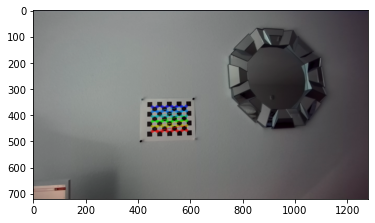

In [19]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

#criteria to stop the subpixel cornes finding algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#size of chess grid
grid_size = 25

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpointsL = [] # 3d point in real world space
imgpointsL = [] # 2d points in image plane.
objpointsR = []
imgpointsR = []

## LEFT CAMERA IMAGES

#load the images from left camera
images = glob.glob('left_*.png')
for fname in images:

   img1 = cv2.imread(fname)

#convert the images into grayscale
   grayL = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    
    
#find the corners and append them to imagepoints
   ret1, cornersL = cv2.findChessboardCorners(grayL, (8,6),None)
   imgpointsL.append(cornersL)
   objpointsL.append(objp)

#improve the localization accuracy 
   cv2.cornerSubPix(grayL, cornersL, (11,11), (-1,1), criteria)

   cv2.drawChessboardCorners(img1, (8,6), cornersL, ret1)
   plt.imshow(img1)
    
    
## RIGHT CAMERA IMAGES (similar processing as done for LEFT CAMERA)
    
images = glob.glob('right_*.png')
for fname in images:

   img2 = cv2.imread(fname)
   grayR = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
   ret2, cornersR = cv2.findChessboardCorners(grayR, (8,6),None)
   imgpointsR.append(cornersR)
   objpointsR.append(objp)

   cv2.cornerSubPix(grayR, cornersR, (11,11), (-1,1), criteria)

   cv2.drawChessboardCorners(img2, (8,6), cornersR, ret2)
   plt.imshow(img2)   
    

## INSTRINSIC CAMERA CALIBRATION

# Left Camera Calibration
retval1, cameraMatrix1, distCoeffs1, rvecs1, tvecs1 = cv2.calibrateCamera(objpointsL, imgpointsL, grayL.shape[::-1],None,None)    

# Right Camera Calibration
retval2, cameraMatrix2, distCoeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(objpointsR, imgpointsR, grayR.shape[::-1],None,None)    
      

## STEREO CALIBRATION

ret, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(objpointsL, imgpointsL, imgpointsR, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, grayL.shape[::-1])

# convert the translation value by multiplying it with chessboard square dimensions  (#in mm)
T = T*grid_size

print (ret)  ## returns reprojection error
print (R) ## rotation matrix
print (T) ## translation matrix
